<a href="https://colab.research.google.com/github/iXiphos/DataMiningMath/blob/main/MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.0

     |████████████████████████████████| 10.8 MB 7.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.


Message-ID: <12206143.1075844795936.JavaMail.evans@thyme>
Date: Mon, 7 May 2001 02:37:00 -0700 (PDT)
From: exchangeinfo@nymex.com
To: sara.shackleton@enron.com
Subject: (01-149) Silver and Gold Options Expiration Operational Procedures
Mime-Version: 1.0
Content-Type: text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding: quoted-printable
X-From: exchangeinfo@nymex.com
X-To: sara.shackleton@enron.com
X-cc: 
X-bcc: 
X-Folder: \Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Notes inbox
X-Origin: SHACKLETON-S
X-FileName: sshackle.nsf

Notice No. 01-149
May 7, 2001

TO:
All COMEX Division Members/Member Firms
All COMEX Division Clearing Members
All COMEX Division Floor Traders
All COMEX Division Operations Managers

FROM:
Michael Campanelli, Vice President
Floor Operations, COMEX Division

RE:
Options Expiration Operational Procedures for the Trading Floor and Clearin=
g=20
Members
___________________________________________________________________________=
___

The expiration date

(Unnamed: 0    0
 file          0
 message       0
 date          0
 subject       0
 X-Folder      0
 X-From        0
 X-To          0
 body          0
 employee      0
 dtype: int64, (94592, 10))

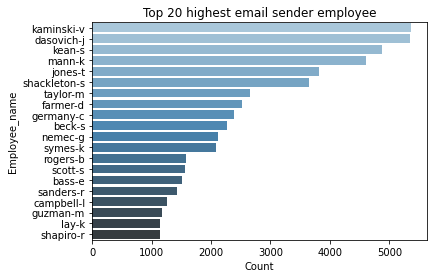

In [ ]:
# -*- coding: utf-8 -*-
"""Cleaning Enron Data Set

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/gist/ChamplainBrent/2e96a148a8bfdcfb1ba57a89ea30b958/cleaning-enron-data-set.ipynb

### Import necessary libraries
"""

import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email

"""### Load Data"""

df = pd.read_csv("/content/emails_MT.csv")

"""### Data Exploration"""

# view first 5 rows of the dataset
df.head()

# get shape of the data
df.shape

# a sample email
print(df.loc[1]['message'])

# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()

# get date
e.get('Date')

# show message body
e.get_payload()

"""### Extract headers"""

# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
#df.head(3)

def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

"""### Employee Names"""

df['file'][:10]

def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

"""### Look into X-Folder"""

#print("number of folders: ", df.shape[0])
#print("number of unique folders: ", df['X-Folder'].unique().shape[0])

unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

"""### Visualize top 20 folders"""

#plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
#plt.show()

"""**Let's see top 20 highest email sender employee**"""

top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
#top_20

"""**Visualize top 20 highest email sender employees**"""

#plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
#plt.show()
"""## Data Cleaning and Transformation

**date : column**
"""

import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

"""**Column : X-Folder**"""

print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

"""**Replace empty missing values in subject with np.nan**"""

def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

df.isnull().sum()

# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

# drop missing value rows
df.dropna(axis=0, inplace=True)

df.isnull().sum(), df.shape

In [ ]:
from scipy import stats

print(df['employee'].value_counts().describe())
print(df['employee'].value_counts().median())
print(stats.median_absolute_deviation(df['employee'].value_counts()))

count     150.000000
mean      630.613333
std       923.957579
min         9.000000
25%       157.750000
50%       325.000000
75%       665.500000
max      5152.000000
Name: employee, dtype: float64
325.0
295.77869999999996


In [ ]:
print(unique_emails.iloc[:5, :])
print(unique_emails.iloc[:-10, :])
print(unique_emails.describe())
print(unique_emails.median())
print(stats.median_absolute_deviation(unique_emails['count']))

                                         folder_name  count
0   \Kay_Mann_June2001_1\Notes Folders\All documents   1259
1   \Tanya_Jones_Dec2000\Notes Folders\All documents   1116
2  \Jeff_Dasovich_June2001\Notes Folders\All docu...   1059
3  \Kay_Mann_June2001_2\Notes Folders\Discussion ...   1005
4  \Sara_Shackleton_Dec2000_June2001_1\Notes Fold...   1000
                                            folder_name  count
0      \Kay_Mann_June2001_1\Notes Folders\All documents   1259
1      \Tanya_Jones_Dec2000\Notes Folders\All documents   1116
2     \Jeff_Dasovich_June2001\Notes Folders\All docu...   1059
3     \Kay_Mann_June2001_2\Notes Folders\Discussion ...   1005
4     \Sara_Shackleton_Dec2000_June2001_1\Notes Fold...   1000
...                                                 ...    ...
3783  \Steven_Kean_Dec2000_1\Notes Folders\Campaign ...      1
3784  \Steven_Kean_Dec2000_1\Notes Folders\Californi...      1
3785  \Steven_Kean_June2001_3\Notes Folders\Business...      1
3786   \Ke

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
import datetime

df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()
df['weekday']
print(df['weekday'].value_counts())

Wednesday    18168
Tuesday      17187
Monday       16558
Thursday     15401
Friday       14436
Sunday        7485
Saturday      5357
Name: weekday, dtype: int64


In [ ]:
print(df['X-From'].loc[df['X-From'] == 'SOblander@carrfut.com'].count())
print(df['subject'].value_counts())
print()
print(df['X-From'].describe())
print()
print(df['X-To'].describe())
print()
print(df['employee'].describe())

111
Re:                                                      1256
RE:                                                      1211
Demand Ken Lay Donate Proceeds from Enron Stock Sales     212
FW:                                                       180
Schedule Crawler: HourAhead Failure                       169
                                                         ... 
FM Letter form for Gallup                                   1
Re: I have a favor for you                                  1
Start Date: 10/27/01; HourAhead hour: 17;  <CODESITE>       1
Southern Union                                              1
Sitara change for Decmeber 2001                             1
Name: subject, Length: 60835, dtype: int64

count        94592
unique       12781
top       Kay Mann
freq          3149
Name: X-From, dtype: object

count                    94592
unique                   30644
top       pete.davis@enron.com
freq                      1041
Name: X-To, dtype: object

count         